# Bases de Datos III: Tarea Nº3 (20%)

## 1. Importacion del dataset

### 1.1 Descripción de los datos

**Track.Name** *(String - cadena de texto)*: 
- Descripción: Nombre de la pista o canción.

**Artist.Name** *(String - cadena de texto)*:
  - Descripción: Nombre del artista o banda que interpreta la canción.

**Genre** *(String - cadena de texto)*:
  - Descripción: Género musical al que pertenece la canción.

**Beats.Per.Minute** *(Integer - entero)*:
  - Descripción: Los latidos por minuto de la canción, un indicativo de su tempo.

**Energy** *(Integer - entero)*:
  - Descripción: Medida de intensidad y actividad.

**Danceability** *(Integer - entero)*:
  - Descripción: Medida de cuán adecuada es una canción para bailar.

**Loudness..dB..** *(Integer - entero)*:
  - Descripción: Volumen de la canción en decibelios.

**Liveness** *(Integer - entero)*:
  - Descripción: Presencia de público en la grabación de la canción. Un valor alto indica que es una grabación en vivo.

**Valence.** *(Integer - entero)*:
  - Descripción: Medida de positividad en la canción.

**Length.** *(Integer - entero)*:
  - Descripción: Duración de la canción en segundos.

**Acousticness..** *(Integer - entero)*:
  - Descripción: Medida que indica cuán acústica es una canción.

**Speechiness.** *(Integer - entero)*:
  - Descripción: Medida que indica la presencia de palabras habladas en la canción.

**Popularity** *(Integer - entero)*:
  - Descripción: Popularidad de la canción en Spotify.

### 1.2 Importacion de los datos

In [80]:
import pandas as pd

# Cargar CSV 
spotify = pd.read_csv("./data/50MasEscuchadosSpotify.csv", encoding='ISO-8859-1')

In [81]:
spotify.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### 1.3 Importacion de librerias

In [82]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors



## 2. Pre-procesamiento de los datos

### 2.1 Selección de los caracteristicas

In [83]:
# Seleccionar características para la agrupación
features = spotify[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity']]

In [84]:
features.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
2,190,80,40,-4,16,70,186,12,46,85
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94


In [6]:
print(features.dtypes)

Beats.Per.Minute    int64
Energy              int64
Danceability        int64
Loudness..dB..      int64
Liveness            int64
Valence.            int64
Length.             int64
Acousticness..      int64
Speechiness.        int64
Popularity          int64
dtype: object


In [85]:
features = features.astype('float64')

In [9]:
print(features.dtypes)

Beats.Per.Minute    float64
Energy              float64
Danceability        float64
Loudness..dB..      float64
Liveness            float64
Valence.            float64
Length.             float64
Acousticness..      float64
Speechiness.        float64
Popularity          float64
dtype: object


### 2.2 Tratar valores atipicos

In [86]:
# Calcular los Z-Scores
z_scores = np.abs((features - features.mean()) / features.std())

# Identificar valores atípicos (Asumiendo un umbral de 3 para los Z-Scores)
outliers_mask = (z_scores >= 3)

# Reemplazar los valores atípicos por la mediana de cada columna
for column in features.columns:
    median_value = features[column].median()
    features.loc[outliers_mask[column], column] = median_value


In [11]:
features.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,117.0,55.0,76.0,-6.0,8.0,75.0,191.0,4.0,3.0,79.0
1,105.0,81.0,79.0,-4.0,8.0,61.0,302.0,8.0,9.0,92.0
2,190.0,80.0,40.0,-4.0,16.0,70.0,186.0,12.0,7.0,85.0
3,93.0,65.0,64.0,-8.0,8.0,55.0,198.0,12.0,19.0,86.0
4,150.0,65.0,58.0,-4.0,11.0,18.0,175.0,45.0,7.0,94.0


### 2.3 Normalización de los datos

In [87]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [13]:
features_scaled

array([[-0.10003973, -0.64306057,  0.36779198, -0.16701216, -0.62799686,
         0.92259536, -0.25702919, -0.96571922, -0.87170148, -2.40956669],
       [-0.4923524 ,  1.20236711,  0.66360322,  0.81541229, -0.62799686,
         0.28944168,  2.6074527 , -0.75300573, -0.27052805,  1.12591491],
       [ 2.28652901,  1.13138912, -3.18194291,  0.81541229,  0.25032042,
         0.69646905, -0.3860599 , -0.54029225, -0.47091919, -0.77780595],
       [-0.88466507,  0.06671931, -0.81545299, -1.14943661, -0.62799686,
         0.01809011, -0.07638618, -0.54029225,  0.73142768, -0.50584583],
       [ 0.97882011,  0.06671931, -1.40707547,  0.81541229, -0.29862788,
        -1.65524462, -0.66992748,  1.21459399, -0.47091919,  1.66983516],
       [-0.59043057,  0.27965327,  0.76220696,  0.32420007, -0.5182072 ,
         1.32962272,  0.49134897, -0.69982736, -0.77150591, -1.04976608],
       [ 1.95960178, -0.00425868,  0.26918823, -0.16701216, -0.73778652,
        -1.4291183 , -1.80539777, -1.07207596

### 2.4 Reduccion de dimensionalidad

In [88]:
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(features_scaled)

In [15]:
data_pca

array([[-0.72062676, -2.19289325, -0.87835049, -0.52711355, -0.24675399,
         1.28431889,  0.94774403, -0.37761809],
       [-1.79582527,  0.47640493, -0.54905803,  1.92419457,  0.69733888,
        -0.25137527, -1.30910981,  0.92517815],
       [-1.19156549,  2.44401298, -0.05900149, -1.72482613,  0.02075388,
         2.59038293,  1.41993299, -0.09416119],
       [ 0.59222111, -0.54286258, -0.24132841,  0.23157395,  0.13943051,
         0.52271587,  0.79280059,  1.44526932],
       [ 0.96966652,  2.02424932,  1.19471826, -1.22200801,  1.28640136,
         0.19725866, -1.18445115, -0.42340213],
       [-1.54510391, -1.43046871, -0.77604796,  0.02552163, -0.3708759 ,
         0.24978184,  0.01282725,  0.28718658],
       [ 2.0418048 ,  1.72055229, -2.13258534, -0.59147912,  1.14865637,
        -0.60766122,  0.31993224, -0.83534016],
       [ 0.05417701,  1.13504605,  0.83786384, -0.58716337,  1.59539432,
         1.09661238,  0.13475837,  1.25214124],
       [ 0.06000706, -0.83578768

### 2.5 Datos finales

In [89]:
# Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")

# Ver las cargas (loadings) de las características para cada componente principal
loadings = pca.components_
for i, component in enumerate(loadings):
    print(f"\nComponente {i + 1}:")
    for feature, loading in zip(features.columns, component):
        print(f"{feature}: {loading}")


Varianza explicada por cada componente: [0.23273422 0.16893538 0.13632546 0.11198081 0.09685127 0.07914615
 0.07234659 0.05172936]

Componente 1:
Beats.Per.Minute: 0.16725048853922364
Energy: -0.5390938972556473
Danceability: -0.027834277164059788
Loudness..dB..: -0.5051307896830287
Liveness: -0.19115531774816222
Valence.: -0.35268313087387143
Length.: -0.22775277385892495
Acousticness..: 0.2288320202583866
Speechiness.: 0.3546585848341594
Popularity: 0.18582062521455117

Componente 2:
Beats.Per.Minute: 0.49981368836737927
Energy: 0.28003687771255253
Danceability: -0.42757233164892233
Loudness..dB..: 0.2317814505076973
Liveness: 0.23317977865530723
Valence.: -0.044587579261753385
Length.: 0.05802802358605936
Acousticness..: 0.024750417443481075
Speechiness.: 0.3136536112150388
Popularity: 0.5258379983788979

Componente 3:
Beats.Per.Minute: -0.3776869047207229
Energy: -0.1705997825639313
Danceability: -0.3865287391704392
Loudness..dB..: 0.006812794623911188
Liveness: 0.4968054957945663


## 4. Análisis de clústers

### 4.1 Análisis Partitioning Clustering: K-means

#### 4.1.1 Justificacion

#### 4.1.2 Elección del número óptimo de clústers con el método Elbow

##### 4.1.2.1 Justifacion

El Método Elbow, también conocido como método del codo, es una técnica utilizada en análisis de clustering para determinar el número óptimo de clusters en un conjunto de datos. La técnica implica trazar la variación explicada, en este caso denominada "distorsión", en función del número de clusters. A medida que aumenta el número de clusters, la distorsión generalmente disminuye. Esto se debe a que, cuando hay más clusters, los puntos de datos tienden a estar más cerca de los centroides de sus respectivos clusters. Sin embargo, aumentar el número de clusters más allá de un cierto punto resulta en rendimientos decrecientes en términos de reducción de distorsión. El objetivo es identificar el punto en el que agregar más clusters ya no proporciona un beneficio significativo en términos de disminución de la distorsión. Este punto se asemeja a un "codo" en el gráfico, de ahí el nombre del método.

Elegimos usar el Método Elbow porque nos permite tomar una decisión informada sobre cuántos clusters utilizar basándonos en un criterio cuantitativo. En lugar de hacer una elección arbitraria o basarse únicamente en el conocimiento del dominio, el Método Elbow nos da una pauta visual y cuantitativa para esta decisión crucial en el análisis de clustering.

##### 4.1.2.2 Aplicación del método Elbow

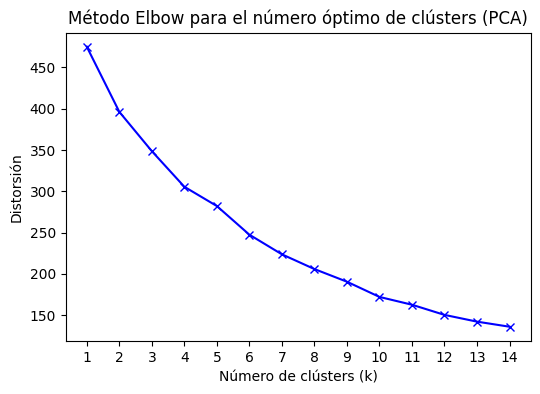

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Método Elbow para encontrar el número óptimo de clústers
distortions = []
K = list(range(1, 15))

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeanModel.fit(data_pca)
    distortions.append(kmeanModel.inertia_)

# Graficar el método Elbow
plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clústers (k)')
plt.ylabel('Distorsión')
plt.title('Método Elbow para el número óptimo de clústers (PCA)')
plt.xticks(range(1, 15))
plt.show()


##### 4.1.2.3 Interpretación de los Resultados del Método Elbow

Al observar el gráfico generado por el Método Elbow para nuestros datos, notamos que la distorsión disminuye rápidamente desde 2 hasta aproximadamente 4 clusters. Posteriormente, la tasa de disminución de la distorsión comienza a nivelarse y se estabiliza. El "codo" del gráfico, que indica el punto en el que la reducción de la distorsión empieza a ser menos significativa al agregar más clusters, parece estar alrededor de k=4. Por lo tanto, podemos concluir que el número óptimo de clusters para nuestros datos es 4.

#### 4.1.3 Clasificación con el modelo

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 4

kmeans = KMeans(n_clusters=k, n_init=3, random_state=42)
kmeans.fit(data_pca)

print(kmeans.labels_)

spotify['Cluster'] = kmeans.labels_

[1 0 2 2 2 2 3 2 2 3 3 2 1 0 2 1 3 1 1 2 2 2 0 0 3 0 1 1 2 0 1 3 2 2 0 2 3
 0 2 1 2 2 1 1 2 2 2 0 0 2]


In [40]:
print(spotify['Cluster'].value_counts())

Cluster
2    22
1    11
0    10
3     7
Name: count, dtype: int64


In [41]:
spotify[['Track.Name', 'Artist.Name', 'Genre', 'Cluster']].head()

,Track.Name,Artist.Name,Genre,Cluster
0,Señorita,Shawn Mendes,canadian pop,1
1,China,Anuel AA,reggaeton flow,0
2,boyfriend (with Social House),Ariana Grande,dance pop,2
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,2
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,2


#### 4.1.4 Gráficos

##### 4.1.5.1 Gráfico bidimensional

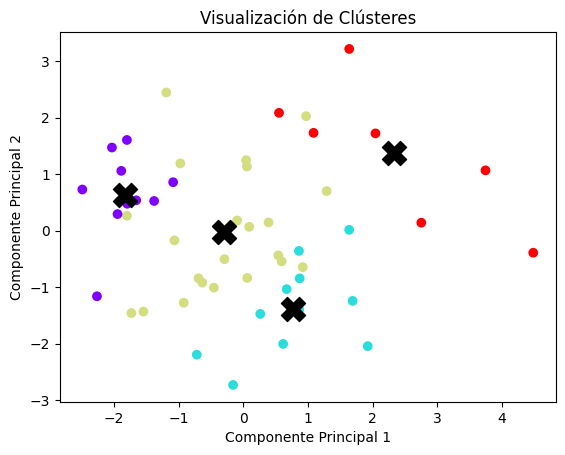

In [42]:
# Visualización de los clústeres
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
# Visualización de los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X')
plt.title("Visualización de Clústeres")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


##### 4.1.5.3 gráfico de pastel (o gráfico circular) para visualizar los porcentajes de datos en cada cluster

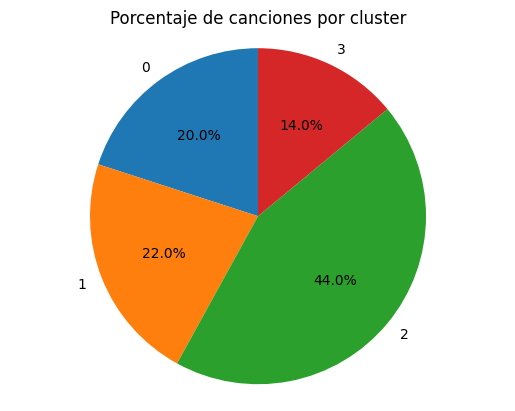

In [23]:
# Agrupación por cluster y conteo
cluster_counts = spotify['Cluster'].value_counts().sort_index()

# Gráfico de pastel
fig, ax = plt.subplots()
ax.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal') 
plt.title('Porcentaje de canciones por cluster')
plt.show()

##### 4.1.5.4 Gráficos: grupos originales vs clusters creados

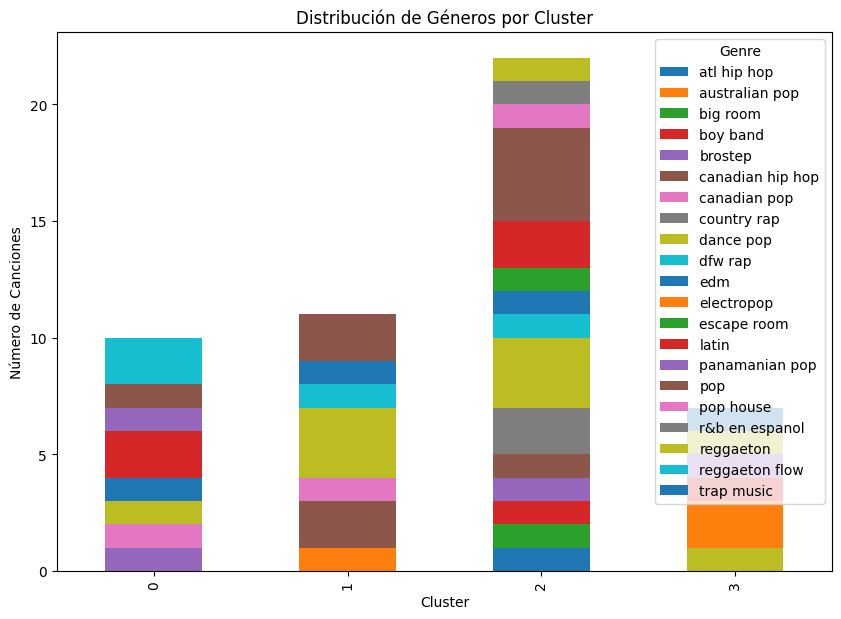

In [27]:
grouped = spotify.groupby(['Cluster', 'Genre']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Número de Canciones')
plt.xlabel('Cluster')
plt.title('Distribución de Géneros por Cluster')
plt.show()

##### 4.1.5.5 Gráficos: grupos originales vs clusters creados

In [43]:
grouped_data = spotify.groupby(['Cluster', 'Genre']).size().reset_index(name='Counts')

In [45]:
def unique_genres(spotify_df):
    genres = spotify_df["Genre"].unique()
    for genre in genres:
        print(genre)

# Usando la función con tu dataframe
unique_genres(spotify)


canadian pop
reggaeton flow
dance pop
pop
dfw rap
trap music
country rap
electropop
reggaeton
panamanian pop
canadian hip hop
latin
escape room
pop house
australian pop
edm
atl hip hop
big room
boy band
r&b en espanol
brostep


In [48]:
genre_colors = {
    'pop': '#1f77b4',
    'canadian pop': '#ff7f0e',
    'reggaeton flow': '#2ca02c',
    'dance pop': '#d62728',
    'dfw rap': '#9467bd',
    'trap music': '#8c564b',
    'country rap': '#e377c2',
    'electropop': '#7f7f7f',
    'reggaeton': '#bcbd22',
    'panamanian pop': '#17becf',
    'canadian hip hop': '#9edae5',
    'latin': '#dbdb8d',
    'escape room': '#c49c94',
    'pop house': '#f7b6d2',
    'australian pop': '#c7c7c7',
    'edm': '#7b4173',
    'atl hip hop': '#be6f64',
    'big room': '#393b79',
    'boy band': '#5254a3',
    'r&b en espanol': '#6b6ecf',
    'brostep': '#9c9ede',
}


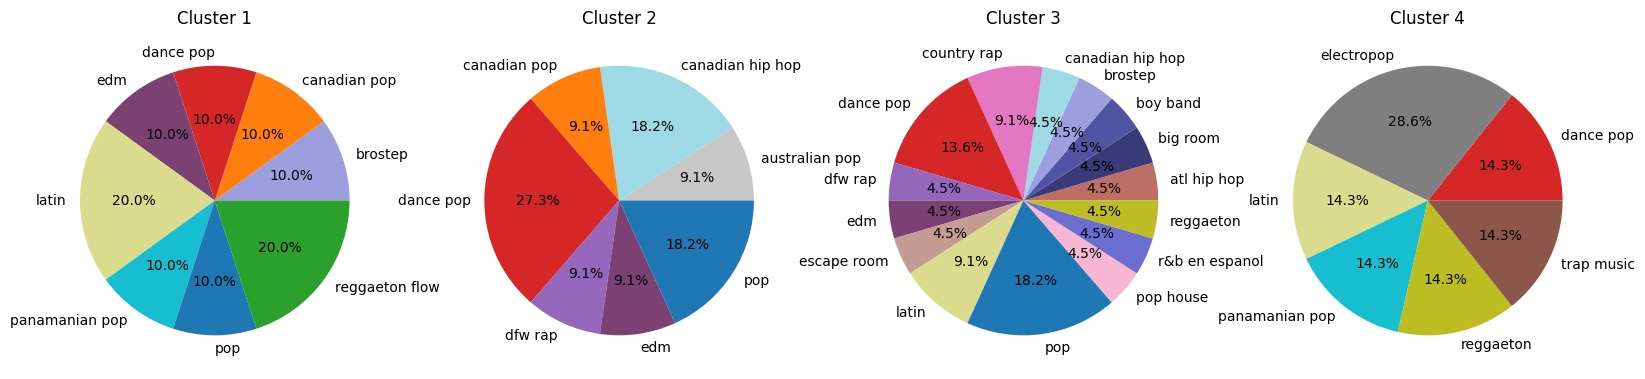

In [49]:
fig, axs = plt.subplots(1, k, figsize=(20, 5))

for i in range(k):
    cluster_data = grouped_data[grouped_data['Cluster'] == i]
    colors = [genre_colors[genre] for genre in cluster_data['Genre']]
    axs[i].pie(cluster_data['Counts'], labels=cluster_data['Genre'], colors=colors, autopct='%1.1f%%')
    axs[i].set_title(f"Cluster {i+1}")

plt.show()

#### 4.1.5 Matriz de confusión

In [25]:
# Crear matriz de confusión
confusion_matrix = pd.crosstab(spotify['Genre'], spotify['Cluster'], rownames=['Generos'], colnames=['Clusters'])
print(confusion_matrix)

Clusters          0  1  2  3
Generos                     
atl hip hop       0  0  1  0
australian pop    0  1  0  0
big room          0  0  1  0
boy band          0  0  1  0
brostep           1  0  1  0
canadian hip hop  0  2  1  0
canadian pop      1  1  0  0
country rap       0  0  2  0
dance pop         1  3  3  1
dfw rap           0  1  1  0
edm               1  1  1  0
electropop        0  0  0  2
escape room       0  0  1  0
latin             2  0  2  1
panamanian pop    1  0  0  1
pop               1  2  4  0
pop house         0  0  1  0
r&b en espanol    0  0  1  0
reggaeton         0  0  1  1
reggaeton flow    2  0  0  0
trap music        0  0  0  1


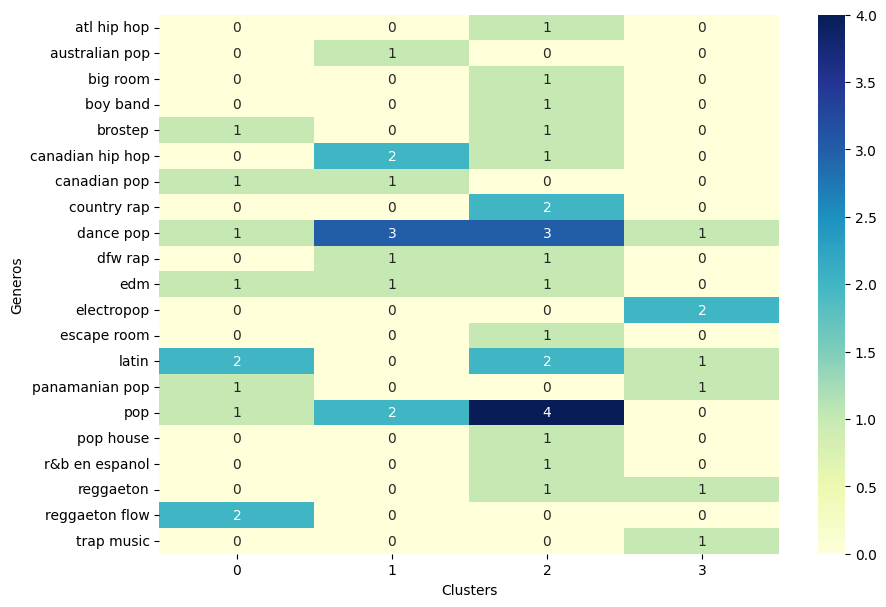

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.show()

### 4.2 Análisis Hierarchical Clustering

#### 4.2.1 Dendograma

##### 4.2.1.1 ¿Que es un dendograma?

Un dendrograma es un diagrama de árbol utilizado en el clustering jerárquico para visualizar la formación de clústeres y sus relaciones. Representa objetos en el eje horizontal y distancias entre ellos en el vertical, mostrando cómo se agrupan en estructuras jerárquicas. Los dendrogramas son valiosos porque ofrecen una vista intuitiva de la estructura de datos, permiten determinar el número óptimo de clústers sin especificarlo previamente y revelan similitudes o disimilitudes entre los objetos del conjunto de datos.

##### 4.2.1.2 Aplicacion

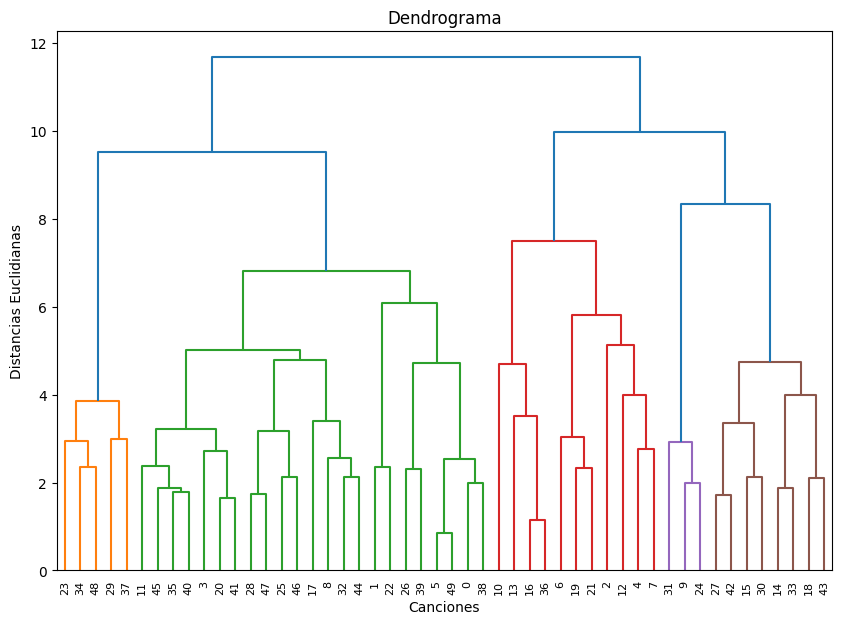

In [17]:
plt.figure(figsize=(10, 7))
dendrograma = sch.dendrogram(sch.linkage(data_pca, method='ward'))  # Usamos el método 'ward' que minimiza la varianza entre los clústeres
plt.title('Dendrograma')
plt.xlabel('Canciones')
plt.ylabel('Distancias Euclidianas')
plt.show()


##### 4.2.1.3 Conclusiones

El dendrograma ilustra una jerarquización de canciones basada en distancias euclidianas. Al trazar una línea horizontal en una distancia de 5, se identifican cinco clústers principales de canciones. Las canciones dentro del clúster azul son altamente similares entre sí, mientras que las del clúster morado muestran mayor variabilidad. Esta representación sugiere agrupaciones de canciones según su similitud, permitiendo discernir entre canciones que comparten características comunes y aquellas que se distinguen más entre sí.

#### 4.2.2 Aplicacion del analisis

In [21]:
clusters = fcluster(sch.linkage(data_pca, method='ward'), t=5, criterion='maxclust')

In [22]:
spotify['Cluster2'] = clusters

#### 4.2.3 Graficos de resultados

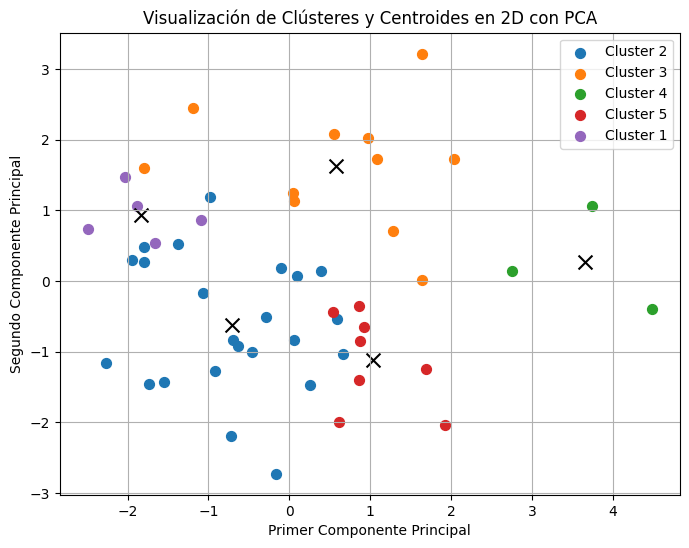

In [50]:
# Agregando las componentes principales al DataFrame original
spotify['PC1'] = data_pca[:, 0]
spotify['PC2'] = data_pca[:, 1]

# Calculando los centroides usando sólo las columnas 'PC1' y 'PC2'
centroids = spotify.groupby('Cluster2')[['PC1', 'PC2']].mean()

# Visualizando los clústeres usando las componentes principales
plt.figure(figsize=(8, 6))
for cluster in spotify['Cluster2'].unique():
    mask = spotify['Cluster2'] == cluster
    plt.scatter(spotify[mask]['PC1'], spotify[mask]['PC2'], label=f'Cluster {cluster}', s=50)
    
    # Dibujando el centroide
    plt.scatter(centroids.loc[cluster, 'PC1'], centroids.loc[cluster, 'PC2'], marker='x', s=100, c='black')

plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualización de Clústeres y Centroides en 2D con PCA')
plt.legend()
plt.grid(True)
plt.show()

### 4.3 Análisis Density-Based Clustering: DBSCAN

#### 4.3.1 ¿Que es el algoritmo DBSCAN?

DBSCAN es un algoritmo de clustering basado en densidad que agrupa puntos según la proximidad y densidad, identificando clusters de formas arbitrarias sin requerir la especificación previa del número de clusters. A diferencia de métodos como k-means, DBSCAN puede detectar y excluir outliers, siendo especialmente útil para datasets con patrones de clustering complejos o cuando no se tiene certeza del número de clusters presentes. Sin embargo, la elección de sus parámetros puede influir significativamente en los resultados.

#### 4.3.2 Elección de `eps` (epsilon)

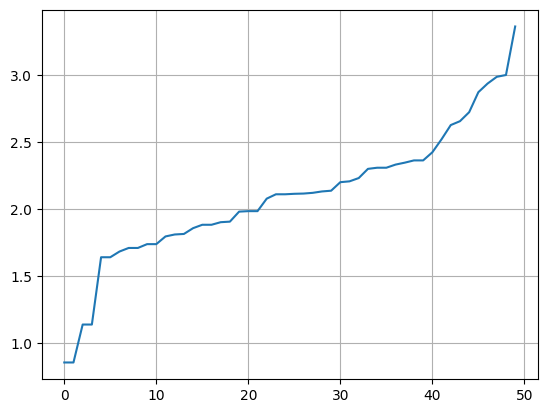

In [55]:
# Calcula las distancias k para cada punto
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(data_pca)
distances, indices = neighbors.kneighbors(data_pca)

# Ordena y grafica las distancias
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid(True)
plt.show()


El análisis de la gráfica de distancias a los vecinos más cercanos sugiere un punto de inflexión evidente en el rango de 1.5 a 2.0. Esta observación indica que un valor óptimo para `eps` en el algoritmo DBSCAN se sitúa dentro de este intervalo, proporcionando una base empírica para la elección de dicho parámetro en nuestro análisis.

#### 4.3.3 Elección de `min_samples`

Una regla general es seleccionar min_samples como 2 * d, donde d es la dimensionalidad del dataset. Por lo tanto, si tu conjunto de datos tiene 5 dimensiones, min_samples podría ser 10.

In [77]:
dbscan = DBSCAN(eps=2, min_samples=4)
clusters = dbscan.fit_predict(data_pca)

In [78]:
spotify['DBSCAN_Clusters'] = clusters

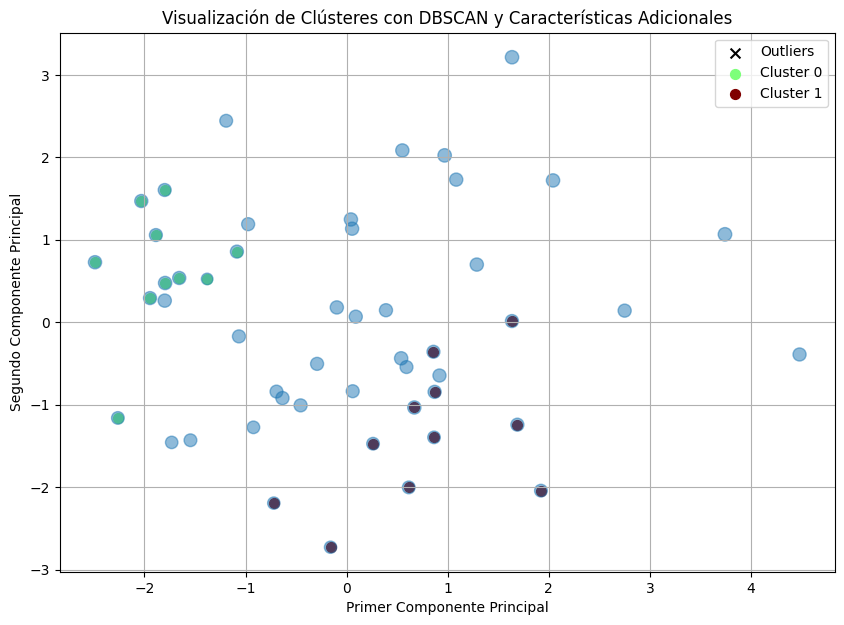

In [75]:
# Visualización
plt.figure(figsize=(10, 7))
clusters = np.unique(dbscan.labels_)
colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    mask = spotify['Cluster'] == cluster
    if cluster == -1:
        # Trata los outliers con un color y estilo de marcador diferentes
        plt.scatter(spotify[mask]['PC1'], spotify[mask]['PC2'], s=50, color='black', marker='x', label='Outliers')
    else:
        plt.scatter(spotify[mask]['PC1'], spotify[mask]['PC2'], s=50, color=color, label=f'Cluster {cluster}')

# Suponiendo que 'popularity' es una columna en tu DataFrame:
size = spotify['Popularity']  # Usa esta columna para determinar el tamaño de los puntos
plt.scatter(spotify['PC1'], spotify['PC2'], s=size, alpha=0.5)  # Dibuja de nuevo para el tamaño

plt.title('Visualización de Clústeres con DBSCAN y Características Adicionales')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend()
plt.grid(True)
plt.show()

#### 4.3.3 Diagrama de dispersión de "Outliers" enfocado

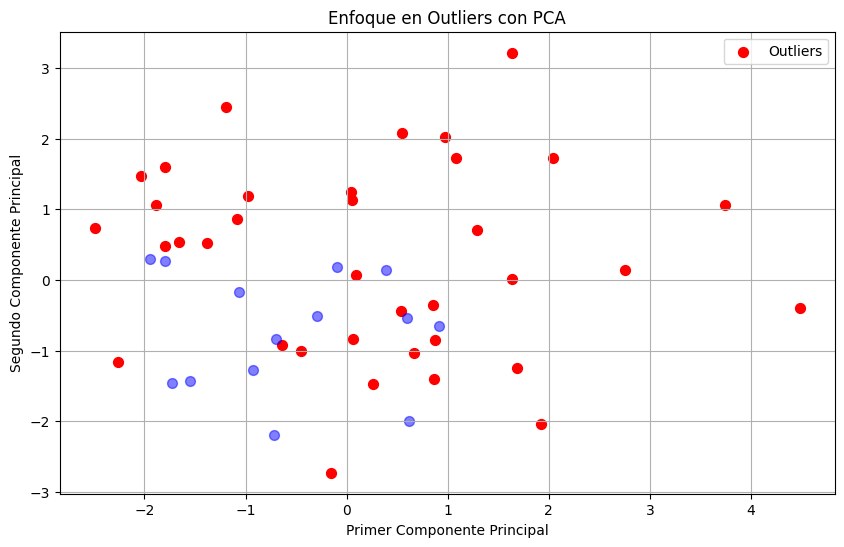

In [94]:
plt.figure(figsize=(10, 6))
# Los outliers en DBSCAN son etiquetados con -1
plt.scatter(data_pca[clusters == -1, 0], data_pca[clusters == -1, 1], color='red', s=50, label='Outliers')
plt.scatter(data_pca[clusters != -1, 0], data_pca[clusters != -1, 1], color='blue', s=50, alpha=0.5)
plt.title('Enfoque en Outliers con PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend()
plt.grid(True)
plt.show()

#### 4.3.4 Histograma o Gráfico de Densidad para cada Clúster

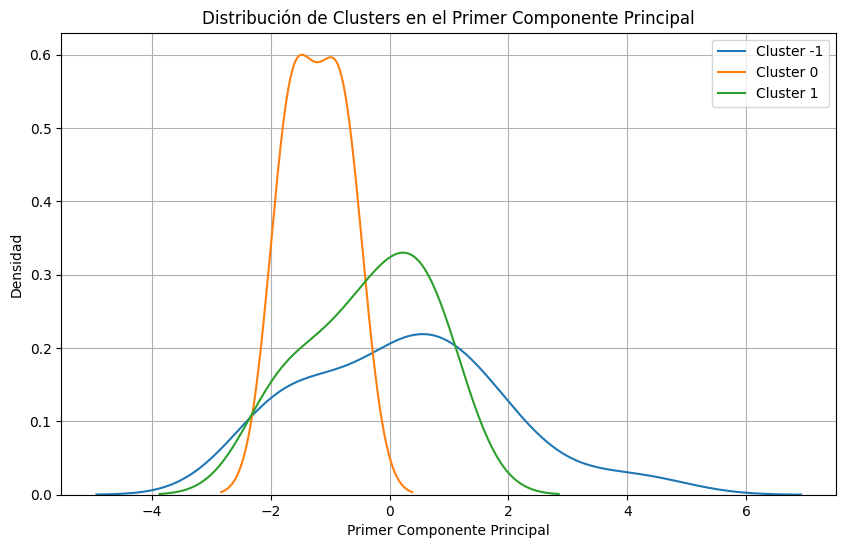

In [99]:
unique_clusters = np.unique(clusters)
plt.figure(figsize=(10, 6))

for label in unique_clusters:
    sns.kdeplot(data_pca[clusters == label, 0], label=f'Cluster {label}')
    
plt.title('Distribución de Clusters en el Primer Componente Principal')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()


#### 4.3.5 Gráfico de Caja (Box Plot) para características clave

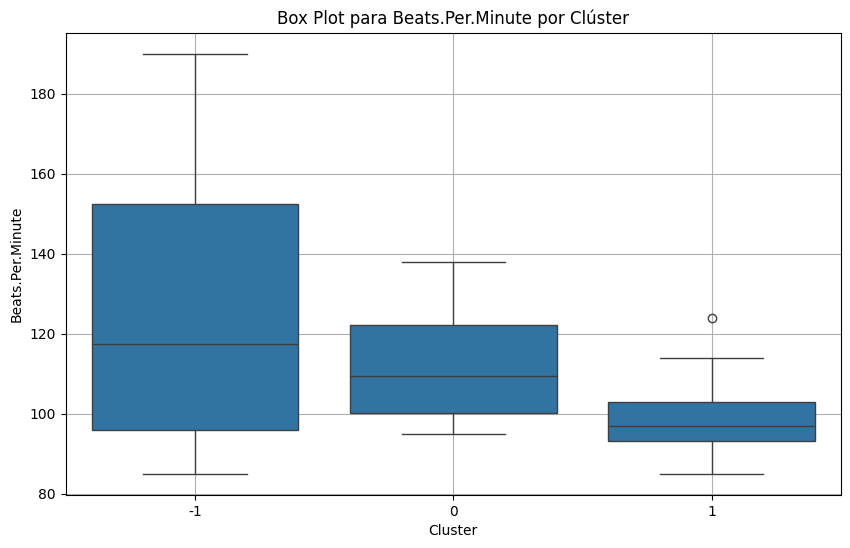

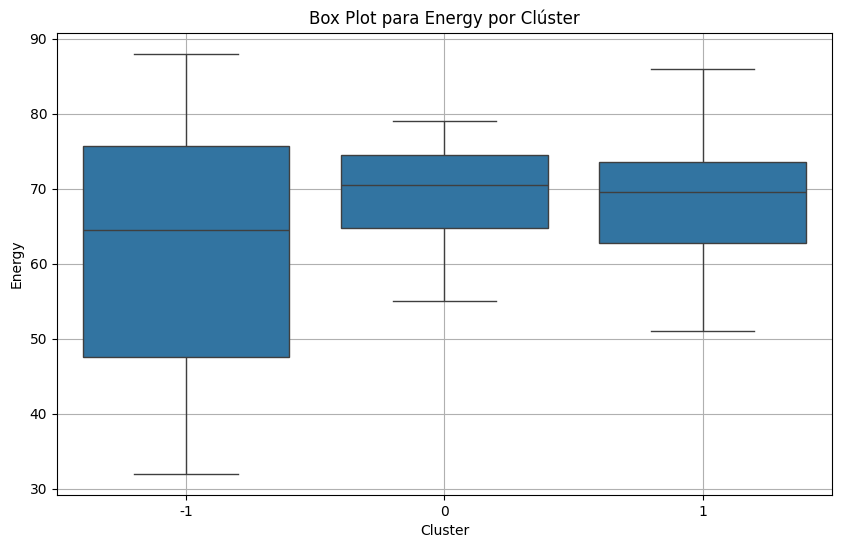

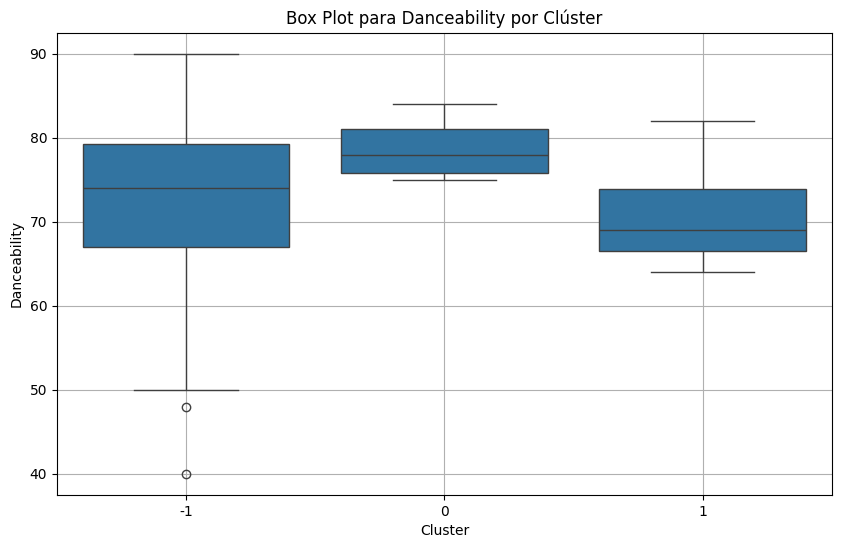

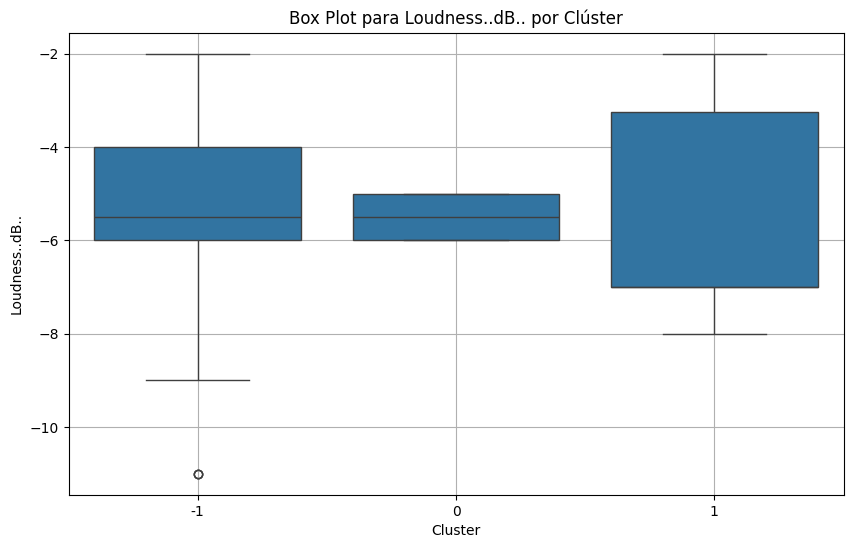

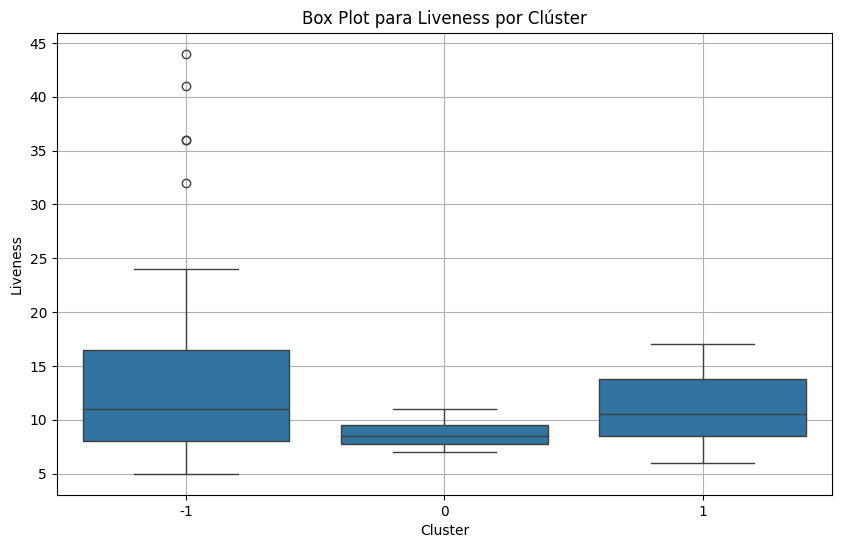

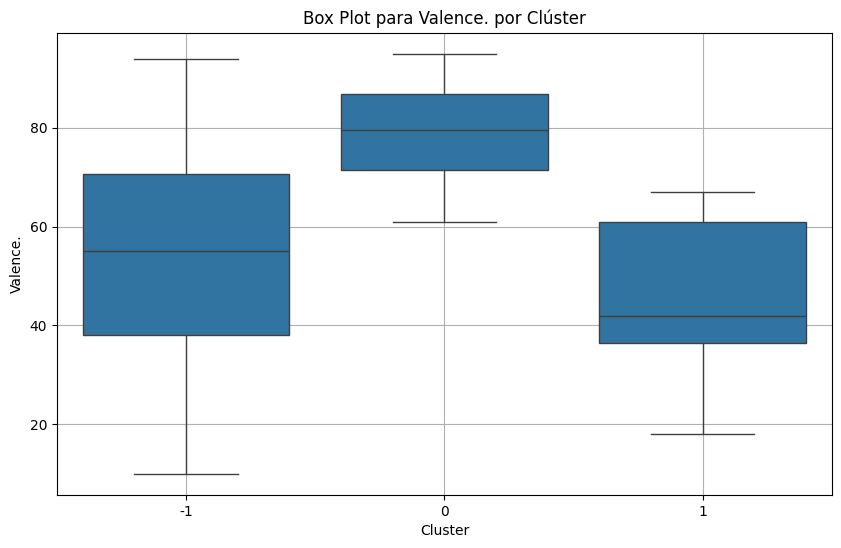

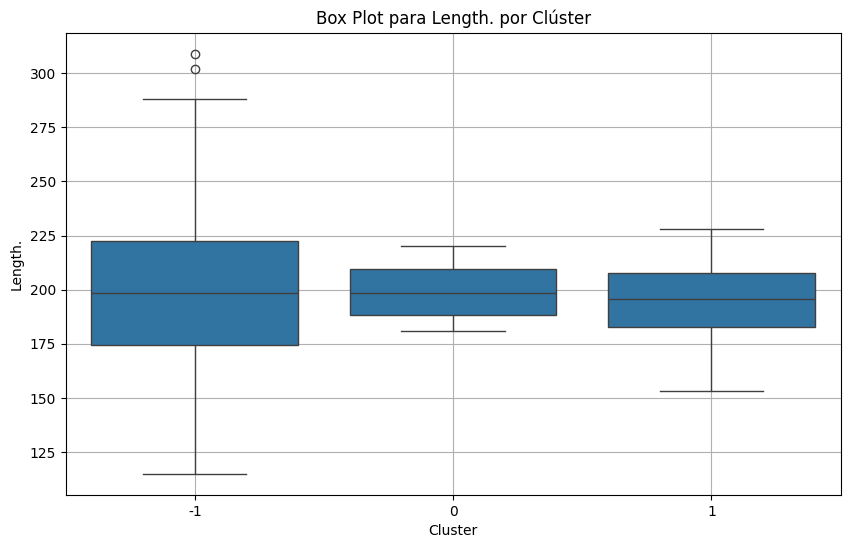

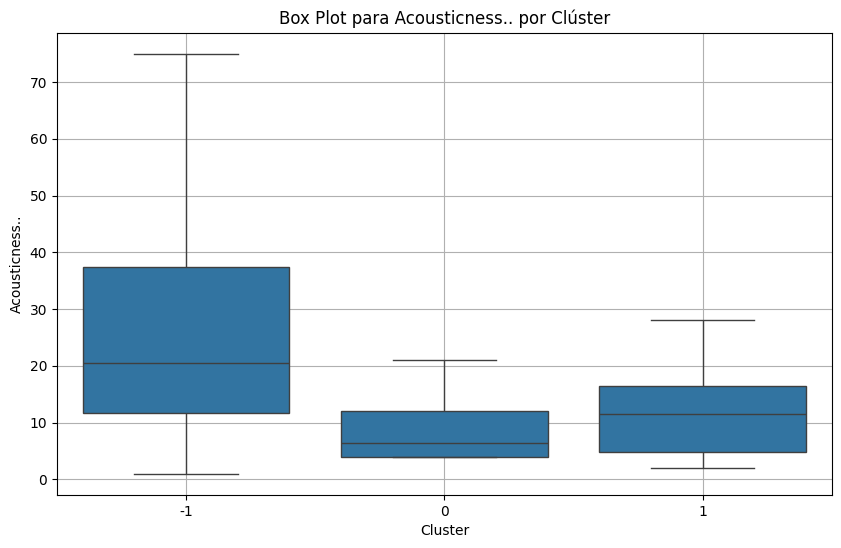

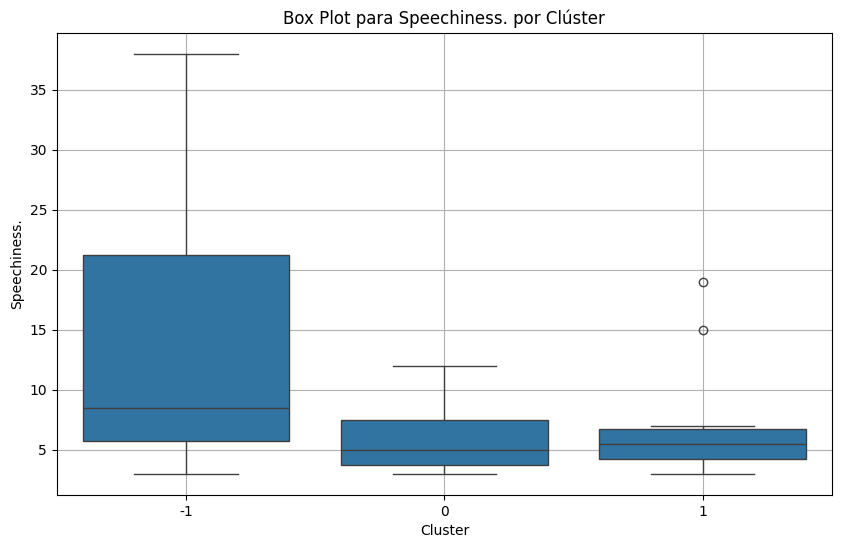

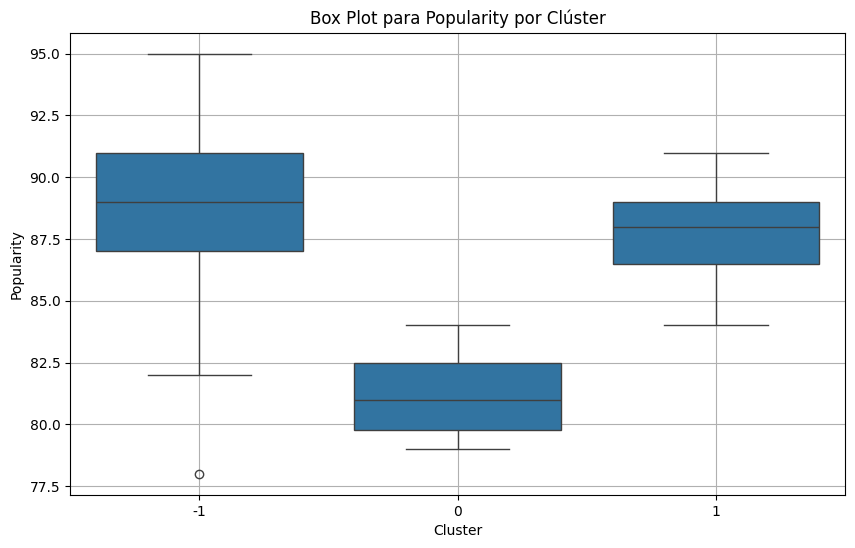

In [97]:
features_to_plot = ['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=clusters, y=features[feature])
    plt.title(f'Box Plot para {feature} por Clúster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()


## 5. Conclusiones

### 5.1 Respuestas a grandes preguntas

#### 5.1.1 ¿Qué diferencia hay entre el conjunto inicial y el final? ¿Qué tan importante es lanormalización en este proceso?

1. **Diferencia entre el conjunto inicial y el final:**
   - **Conjunto Inicial:** El conjunto inicial consistía en datos crudos que incluían nombres de canciones, artistas, géneros y varios atributos numéricos como BPM, energía, danzabilidad, entre otros. Era una representación directa de la información de varias canciones y sus características.
   - **Conjunto Final:** Después de la selección de características, tratamiento de valores atípicos, normalización y reducción de dimensionalidad, el conjunto final se transformó en una matriz numérica estandarizada y de menor dimensión. Las canciones ahora están representadas como vectores en un espacio de características reducido, listos para ser analizados por algoritmos de clustering.

2. **Importancia de la normalización en este proceso:**
La normalización es vital en el análisis de clustering para varios algoritmos, no sólo DBSCAN sino también Hierarchical Clustering y K-means. Esto se debe a que estos algoritmos se basan en medidas de distancia (como la distancia euclidiana) para formar clústeres. Si no se normalizan los datos, las características con valores más grandes o con mayor varianza podrían tener un peso desproporcionado en la formación de clústeres. La normalización garantiza que todas las características sean tratadas por igual, independientemente de su escala original.

3. **Tratamiento de valores atípicos y su importancia:**
Los valores atípicos pueden afectar adversamente los resultados del clustering, ya que pueden distorsionar las distancias entre los puntos y, por lo tanto, la formación de clústeres. Al reemplazar los valores atípicos por la mediana de cada característica, se logra una distribución más homogénea de los datos, lo que permite que los algoritmos de clustering trabajen de manera más efectiva.

4. **Reducción de dimensionalidad y su relevancia:**
La reducción de dimensionalidad con PCA es una técnica que permite transformar un conjunto de datos de alta dimensión en uno de menor dimensión, preservando la mayor cantidad de varianza posible. En el contexto de clustering, esto no sólo acelera los cálculos, sino que también puede mejorar la calidad de los clústeres al eliminar el ruido o la información redundante presente en los datos originales.

Al combinar todos estos pasos (selección de características, tratamiento de valores atípicos, normalización y reducción de dimensionalidad), se preparó el conjunto de datos de manera óptima para el análisis de clustering, lo que permitió obtener resultados más precisos y significativos con los algoritmos aplicados (DBSCAN, Hierarchical Clustering y K-means).

#### 5.1.2 ¿Qué puede concluir respecto de ambos métodos utilizados?, ¿entregan resultados similares? saque conclusiones del trabajo realizado.

1. **Análisis Partitioning Clustering: K-means**
   - **Observaciones**: Este método parece haber creado clústeres bien definidos, y parece que se ha utilizado el análisis de componentes principales (PCA) para visualizar los resultados en 2D.
   - **Conclusiones**: K-means es efectivo cuando los clústeres son convexos y relativamente del mismo tamaño. Como es un algoritmo basado en centroides, los clústeres se definen por el promedio de los puntos en ese clúster, lo que podría ser una limitación si hay clústeres con formas no convexas o si hay muchos valores atípicos.

2. **Análisis Hierarchical Clustering**
   - **Observaciones**: Este método generalmente crea una estructura jerárquica o dendrograma de clústeres.
   - **Conclusiones**: El clustering jerárquico es útil para entender la estructura y la relación entre los datos en diferentes niveles de granularidad. Sin embargo, puede ser computacionalmente intensivo y menos adecuado para conjuntos de datos muy grandes.

3. **Análisis Density-Based Clustering: DBSCAN**
   - **Observaciones**: A partir de los gráficos, se puede observar que DBSCAN identifica clústeres basados en la densidad y tiene la capacidad de identificar y aislar valores atípicos.
   - **Conclusiones**: DBSCAN es efectivo cuando los clústeres son de formas arbitrarias y hay ruido en los datos. No necesita que se especifique el número de clústeres a priori, lo que es una ventaja. Sin embargo, puede tener dificultades cuando los clústeres tienen diferentes densidades.

**Comparación entre métodos**:
- **Similitud de Resultados**: Aunque los tres métodos son inherentemente diferentes en su enfoque, los gráficos presentados muestran que hay cierta similitud en cómo los datos están agrupados. Sin embargo, pueden diferir en cómo manejan los valores atípicos y la forma de los clústeres.
- **Aplicabilidad**: La elección del método debe basarse en la naturaleza de los datos y el objetivo del análisis. Mientras que K-means puede ser adecuado para clústeres convexos y bien separados, DBSCAN podría ser preferido para datos con clústeres de formas arbitrarias y presencia de ruido. El clustering jerárquico proporciona una visión más detallada de la estructura de los datos.